In [1]:
#attained data from ABS https://www.abs.gov.au/statistics/people/housing/housing-occupancy-and-costs/2019-20
#downloaded excel data 12. Data for Housing occupancy costs, states and territories
#created worksheet and compiled worksheets containing mean weekly costs
#using data set from 2015-2020
#Mean housing costs for couples and one parent families with dependent children has been taken into account
#to analyse the cost of living and affordability for housing


In [1]:
#Import Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
# Read in all sheets
df_dict = pd.read_excel('../Resources/housing_data.xlsx',engine="openpyxl", sheet_name=["NSW", "VIC", "QLD", "SA", "WA", "TAS", "NT", "ACT"])

#Concat dict to one df
df = pd.concat(df_dict)
df = df.reset_index(drop=False)

#Drop invalid columns
df.drop('level_1', inplace=True, axis=1)
df.drop('Unnamed: 1', inplace=True, axis=1)
df.drop(0)

#drop columns not required for analysis
df.drop(columns=['1994–95', '1995–96', '1996–97', '1997–98', '1999–00', '2000–01', '2002–03', '2003–04', '2005–06', '2007–08', '2009–10', '2011–12', '2013–14'], inplace=True, axis=1)

# set nan value to index
df.iloc[0,1] = 'Index'

#Rename columns
df.rename(columns={"level_0":"State"}, inplace=True)
df.rename(columns={"Unnamed: 0":"Mean Housing Costs"}, inplace=True)

# Set new index
df_index = df.set_index('Mean Housing Costs')
df_index = df_index.drop(["Index", "Mean housing costs per week in 2019–20 dollars"])

#convert the data into numeric
df_index[['2015–16', '2017–18', '2019–20']] = df_index[['2015–16', '2017–18', '2019–20']].apply(pd.to_numeric)

#Fill in the Nan values
df_index.fillna('', inplace=True)
df_index.head(10)

,State,2015–16,2017–18,2019–20
Mean Housing Costs,,,,
Tenure and landlord type (a),NSW,,,
Owner without a mortgage,NSW,52,50,51
Owner with a mortgage,NSW,522,524,574
Renter,NSW,,,
State or territory housing authority,NSW,199,167,156
Private landlord,NSW,470,482,474
Total renters (b),NSW,428,435,432
Total (c),NSW,332,344,356
Family composition of household,NSW,,,


In [3]:
#get data frame for couples with dependent children
couples_data = df_index.filter(like="Couple family with dependent children", axis=0)
couples_data

,State,2015–16,2017–18,2019–20
Mean Housing Costs,,,,
Couple family with dependent children,NSW,473,519,538
Couple family with dependent children,VIC,440,456,460
Couple family with dependent children,QLD,433,463,422
Couple family with dependent children,SA,408,391,382
Couple family with dependent children,WA,491,512,414
Couple family with dependent children,TAS,340,329,323
Couple family with dependent children,NT,530,511,496
Couple family with dependent children,ACT,488,485,527


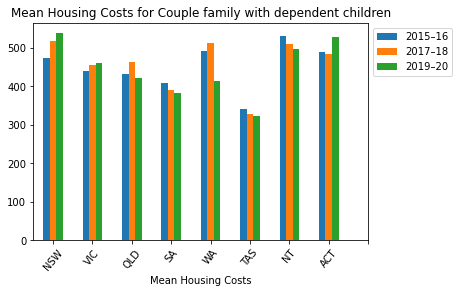

In [4]:
couples_data.plot.bar(rot=50, title="Mean Housing Costs for Couple family with dependent children");
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8), ('NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS','NT', 'ACT'))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show(block=True);

In [5]:
#get data frame for one parent with dependent children
singles_data = df_index.filter(like="One parent family with dependent children", axis=0)
singles_data

,State,2015–16,2017–18,2019–20
Mean Housing Costs,,,,
One parent family with dependent children,NSW,405,350,390
One parent family with dependent children,VIC,309,410,308
One parent family with dependent children,QLD,325,348,314
One parent family with dependent children,SA,296,293,314
One parent family with dependent children,WA,346,291,328
One parent family with dependent children,TAS,251,266,258
One parent family with dependent children,NT,297,349,324
One parent family with dependent children,ACT,334,340,288


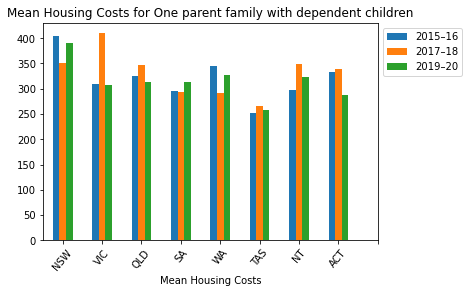

In [6]:
singles_data.plot.bar(rot=50, title="Mean Housing Costs for One parent family with dependent children");
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8), ('NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS','NT', 'ACT'))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show(block=True);

In [ ]:
# According to the ABS website the definition of housing costs is as below
# In the data used for this analysis, housing costs are defined as the sum of rent payments; 
# rate payments (water and general); and mortgage or unsecured loan payments 
# (if the initial purpose of the loan was primarily to buy, add, or alter the dwelling).
# In this analysis families with dependent children were taken from each state to show the mean housing costs 
# across all the states.

# The data shows that the most affordable state for a couple with dependent children in 2019-20 was Tasmania.
# The mean housing cost remained comparable across the 5 years from 2015-20
# The data shows that the least affordable state for a couple with dependent children in 2019-20 was NSW.

# The data shows that the most affordable state for one parent with dependent children in 2019-20 was Tasmania.
# The mean housing cost also remained comparable across the 5 years from 2015-20
# The data shows that the least affordable state for a couple with dependent children in 2019-20 was NSW.